# Model RESNET18

In [1]:
import torch.nn as nn

class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()

        self.dropout_percentage = 0.5
        self.relu = nn.ReLU()

        # BLOCK-1 (starting block) input=(224x224) output=(112x112)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.batchnorm1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

        # BLOCK-2 (1) input=(112x112) output = (56x56)
        self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_1 = nn.BatchNorm2d(64)
        self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_1_2 = nn.BatchNorm2d(64)
        self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-2 (2)
        self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_1 = nn.BatchNorm2d(64)
        self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm2_2_2 = nn.BatchNorm2d(64)
        self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-3 (1) input=(56x56) output = (28x28)
        self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm3_1_1 = nn.BatchNorm2d(128)
        self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_1_2 = nn.BatchNorm2d(128)
        self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-3 (2)
        self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_1 = nn.BatchNorm2d(128)
        self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm3_2_2 = nn.BatchNorm2d(128)
        self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-4 (1) input=(28x28) output = (14x14)
        self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm4_1_1 = nn.BatchNorm2d(256)
        self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_1_2 = nn.BatchNorm2d(256)
        self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-4 (2)
        self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_1 = nn.BatchNorm2d(256)
        self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm4_2_2 = nn.BatchNorm2d(256)
        self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)

        # BLOCK-5 (1) input=(14x14) output = (7x7)
        self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.batchnorm5_1_1 = nn.BatchNorm2d(512)
        self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_1_2 = nn.BatchNorm2d(512)
        self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
                                         padding=(0, 0))
        self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
        # BLOCK-5 (2)
        self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_1 = nn.BatchNorm2d(512)
        self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.batchnorm5_2_2 = nn.BatchNorm2d(512)
        self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)

        # Final Block input=(7x7)
        self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
        self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
        self.out = nn.Linear(in_features=1000, out_features=num_classes)
        # END

    def forward(self, x):
        # block 1 --> Starting block
        x = self.relu(self.batchnorm1(self.conv1(x)))
        op1 = self.maxpool1(x)

        # block2 - 1
        x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
        x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
        x = self.dropout2_1(x)
        # block2 - Adjust - No adjust in this layer as dimensions are already same
        # block2 - Concatenate 1
        op2_1 = self.relu(x + op1)
        # block2 - 2
        x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
        x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
        x = self.dropout2_2(x)
        # op - block2
        op2 = self.relu(x + op2_1)

        # block3 - 1[Convolution block]
        x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
        x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
        x = self.dropout3_1(x)
        # block3 - Adjust
        op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
        # block3 - Concatenate 1
        op3_1 = self.relu(x + op2)
        # block3 - 2[Identity Block]
        x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
        x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
        x = self.dropout3_2(x)
        # op - block3
        op3 = self.relu(x + op3_1)

        # block4 - 1[Convolition block]
        x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
        x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
        x = self.dropout4_1(x)
        # block4 - Adjust
        op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
        # block4 - Concatenate 1
        op4_1 = self.relu(x + op3)
        # block4 - 2[Identity Block]
        x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
        x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
        x = self.dropout4_2(x)
        # op - block4
        op4 = self.relu(x + op4_1)

        # block5 - 1[Convolution Block]
        x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
        x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
        x = self.dropout5_1(x)
        # block5 - Adjust
        op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
        # block5 - Concatenate 1
        op5_1 = self.relu(x + op4)
        # block5 - 2[Identity Block]
        x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
        x = self.batchnorm5_2_2(self.conv5_2_2(x))  # conv5_2
        x = self.dropout5_2(x)
        # op - block5
        op5 = self.relu(x + op5_1)

        # FINAL BLOCK - classifier
        x = self.avgpool(op5)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc(x))
        x = self.out(x)

        return x

# Resnet18 trainning

Training:  30%|█████████▍                     | 281/925 [01:52<03:30,  3.06it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Valid: 100%|██████████████████████████████████| 132/132 [00:40<00:00,  3.29it/s]


Epoch 0: Train loss = 1.6215130153862205, Train accuracy: 0.3783960694799552
Epoch 0: Validation loss = 1.6855373256134265, Validation accuracy: 0.37757915698669176
Validation accuracy increased (0 --> 0.37757915698669176). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.83it/s]


Epoch 1: Train loss = 1.2995649558144646, Train accuracy: 0.5084027883974281
Epoch 1: Validation loss = 1.3006518803762668, Validation accuracy: 0.5188744072661255
Validation accuracy increased (0.37757915698669176 --> 0.5188744072661255). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 2: Train loss = 1.1098998353932354, Train accuracy: 0.5776938398142119
Epoch 2: Validation loss = 0.9856958005464438, Validation accuracy: 0.6292695362459529
Validation accuracy increased (0.5188744072661255 --> 0.6292695362459529). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 3: Train loss = 0.961290003834544, Train accuracy: 0.6324046107562813
Epoch 3: Validation loss = 0.9689187734867587, Validation accuracy: 0.6320992015076407
Validation accuracy increased (0.6292695362459529 --> 0.6320992015076407). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.77it/s]


Epoch 4: Train loss = 0.8493029633406046, Train accuracy: 0.6707828794621132
Epoch 4: Validation loss = 0.8781984568093762, Validation accuracy: 0.67406304045157
Validation accuracy increased (0.6320992015076407 --> 0.67406304045157). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.84it/s]


Epoch 5: Train loss = 0.7576739709119539, Train accuracy: 0.705995244915421
Epoch 5: Validation loss = 0.9197970565521356, Validation accuracy: 0.641799667793693


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  5.01it/s]


Epoch 6: Train loss = 0.6749901023426571, Train accuracy: 0.7352338091102806
Epoch 6: Validation loss = 1.0182182233441959, Validation accuracy: 0.620276061197122


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.93it/s]


Epoch 7: Train loss = 0.6161536527324367, Train accuracy: 0.7559943677605809
Epoch 7: Validation loss = 0.8288500254804437, Validation accuracy: 0.668888055239663


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.80it/s]


Epoch 8: Train loss = 0.557549477815628, Train accuracy: 0.7773815293569822
Epoch 8: Validation loss = 0.7226451560854912, Validation accuracy: 0.722347501326691
Validation accuracy increased (0.67406304045157 --> 0.722347501326691). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.59it/s]


Epoch 9: Train loss = 0.5085953142916834, Train accuracy: 0.7973221340694943
Epoch 9: Validation loss = 0.6354355149422631, Validation accuracy: 0.7382216792215001
Validation accuracy increased (0.722347501326691 --> 0.7382216792215001). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.80it/s]


Epoch 10: Train loss = 0.4547425755938968, Train accuracy: 0.8183094616516217
Epoch 10: Validation loss = 0.6351701233423117, Validation accuracy: 0.7472533317226352
Validation accuracy increased (0.7382216792215001 --> 0.7472533317226352). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.76it/s]


Epoch 11: Train loss = 0.41805194980389365, Train accuracy: 0.8304925948220331
Epoch 11: Validation loss = 0.8249597145300923, Validation accuracy: 0.6609845820701483


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.81it/s]


Epoch 12: Train loss = 0.3822609155363328, Train accuracy: 0.8473085733362147
Epoch 12: Validation loss = 0.5573271592006539, Validation accuracy: 0.7818136906081979
Validation accuracy increased (0.7472533317226352 --> 0.7818136906081979). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.87it/s]


Epoch 13: Train loss = 0.3458856923475459, Train accuracy: 0.8594491386413574
Epoch 13: Validation loss = 0.6129777743622209, Validation accuracy: 0.7581038764028838


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 14: Train loss = 0.31707561752683405, Train accuracy: 0.872973820389928
Epoch 14: Validation loss = 0.6023042633226423, Validation accuracy: 0.7699738551269878


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.73it/s]


Epoch 15: Train loss = 0.2899014564543157, Train accuracy: 0.8816677306793832
Epoch 15: Validation loss = 0.5347403231443781, Validation accuracy: 0.7917126372005
Validation accuracy increased (0.7818136906081979 --> 0.7917126372005). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.71it/s]


Epoch 16: Train loss = 0.2678553719214491, Train accuracy: 0.8877270701769236
Epoch 16: Validation loss = 0.5893454332694863, Validation accuracy: 0.7718310356140137


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.83it/s]


Epoch 17: Train loss = 0.24795328584273119, Train accuracy: 0.8966430334142736
Epoch 17: Validation loss = 0.5771894808294196, Validation accuracy: 0.7815950567072089


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 18: Train loss = 0.23223387766931508, Train accuracy: 0.9029198009903366
Epoch 18: Validation loss = 0.5610648183095636, Validation accuracy: 0.7760181282505845


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.88it/s]


Epoch 19: Train loss = 0.20571473057205614, Train accuracy: 0.9140194861308948
Epoch 19: Validation loss = 0.6060561428241658, Validation accuracy: 0.7660127255049619


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 20: Train loss = 0.19125239897418667, Train accuracy: 0.9207638201842437
Epoch 20: Validation loss = 0.7544166946952994, Validation accuracy: 0.7139256551410212


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.84it/s]


Epoch 21: Train loss = 0.18110980669590268, Train accuracy: 0.9222287231522638
Epoch 21: Validation loss = 0.5737433403053067, Validation accuracy: 0.7639669062513293


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.79it/s]


Epoch 22: Train loss = 0.1612173978581622, Train accuracy: 0.9287877869606018
Epoch 22: Validation loss = 0.5692947099380421, Validation accuracy: 0.7922410192814741
Validation accuracy increased (0.7917126372005 --> 0.7922410192814741). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.74it/s]


Epoch 23: Train loss = 0.16722873880653769, Train accuracy: 0.9271986995516597
Epoch 23: Validation loss = 0.5431212581355463, Validation accuracy: 0.7974106971964692
Validation accuracy increased (0.7922410192814741 --> 0.7974106971964692). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.72it/s]


Epoch 24: Train loss = 0.15319180492513082, Train accuracy: 0.9341588403727558
Epoch 24: Validation loss = 0.5620518206534061, Validation accuracy: 0.787335320855632


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.84it/s]


Epoch 25: Train loss = 0.13908655669540168, Train accuracy: 0.9407486544428645
Epoch 25: Validation loss = 0.5461081623127966, Validation accuracy: 0.7862760248509321


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 26: Train loss = 0.13106210018785017, Train accuracy: 0.9445662564200324
Epoch 26: Validation loss = 0.5577757000132944, Validation accuracy: 0.8024349384235613
Validation accuracy increased (0.7974106971964692 --> 0.8024349384235613). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.80it/s]


Epoch 27: Train loss = 0.12447542979633687, Train accuracy: 0.947424003175787
Epoch 27: Validation loss = 0.5042671620789351, Validation accuracy: 0.8274934151858995
Validation accuracy increased (0.8024349384235613 --> 0.8274934151858995). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.77it/s]


Epoch 28: Train loss = 0.12396081597972158, Train accuracy: 0.9484921386435226
Epoch 28: Validation loss = 0.6033668756259211, Validation accuracy: 0.7860108559781854


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.79it/s]


Epoch 29: Train loss = 0.11375569326299671, Train accuracy: 0.953223306423909
Epoch 29: Validation loss = 0.5900506759909067, Validation accuracy: 0.7878768769177523


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.88it/s]


Epoch 30: Train loss = 0.1137143916682013, Train accuracy: 0.949699914906476
Epoch 30: Validation loss = 0.5808570106146913, Validation accuracy: 0.8135923485864293


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 31: Train loss = 0.10155806913027993, Train accuracy: 0.9565951087668135
Epoch 31: Validation loss = 0.5890609562171228, Validation accuracy: 0.7965246601538225


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.87it/s]


Epoch 32: Train loss = 0.09904579853752275, Train accuracy: 0.9533452410311313
Epoch 32: Validation loss = 0.5602723801452102, Validation accuracy: 0.7981367745634281


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.76it/s]


Epoch 33: Train loss = 0.09837481672145627, Train accuracy: 0.9567178695910685
Epoch 33: Validation loss = 0.5306310027160428, Validation accuracy: 0.8217449599143231


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 34: Train loss = 0.08856338355211994, Train accuracy: 0.9638430688832257
Epoch 34: Validation loss = 0.6008810980076139, Validation accuracy: 0.8022580819599556


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.71it/s]


Epoch 35: Train loss = 0.08622845846983428, Train accuracy: 0.9617005417153642
Epoch 35: Validation loss = 0.564931740363439, Validation accuracy: 0.8102745160912023


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.84it/s]


Epoch 36: Train loss = 0.09008680127699532, Train accuracy: 0.9612814447686479
Epoch 36: Validation loss = 0.6632490391758356, Validation accuracy: 0.7866926847985296


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.84it/s]


Epoch 37: Train loss = 0.07988262147693014, Train accuracy: 0.9661871754156577
Epoch 37: Validation loss = 0.4882803408598358, Validation accuracy: 0.83544783429666
Validation accuracy increased (0.8274934151858995 --> 0.83544783429666). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.77it/s]


Epoch 38: Train loss = 0.08441305564414407, Train accuracy: 0.9656144520398733
Epoch 38: Validation loss = 0.6006326894416953, Validation accuracy: 0.8124768729462768


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.87it/s]


Epoch 39: Train loss = 0.07736392159795237, Train accuracy: 0.9678797988633852
Epoch 39: Validation loss = 0.5233733841415608, Validation accuracy: 0.8170590057517543


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.62it/s]


Epoch 40: Train loss = 0.0729551746574155, Train accuracy: 0.9680132876860129
Epoch 40: Validation loss = 0.678986327101787, Validation accuracy: 0.777071606480714


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.51it/s]


Epoch 41: Train loss = 0.07229799960928693, Train accuracy: 0.967775486868781
Epoch 41: Validation loss = 0.6435188715430823, Validation accuracy: 0.7843748245275382


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.51it/s]


Epoch 42: Train loss = 0.06830718829076284, Train accuracy: 0.9698527944410169
Epoch 42: Validation loss = 0.6228381229959654, Validation accuracy: 0.7918474823236465


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.61it/s]


Epoch 43: Train loss = 0.065727547580263, Train accuracy: 0.9722320354951395
Epoch 43: Validation loss = 0.6065716294176651, Validation accuracy: 0.7922402530005483


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 44: Train loss = 0.06921447508137774, Train accuracy: 0.9696248532630302
Epoch 44: Validation loss = 0.6689311506395991, Validation accuracy: 0.7869355583732779


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.52it/s]


Epoch 45: Train loss = 0.06393439976360045, Train accuracy: 0.973177219597069
Epoch 45: Validation loss = 0.5419134976568095, Validation accuracy: 0.8291341666922425


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.54it/s]


Epoch 46: Train loss = 0.06682296465799162, Train accuracy: 0.970775603281485
Epoch 46: Validation loss = 0.6166897023266013, Validation accuracy: 0.7957435629584573


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.62it/s]


Epoch 47: Train loss = 0.060250153942033646, Train accuracy: 0.9744099161431596
Epoch 47: Validation loss = 0.5860988578448693, Validation accuracy: 0.8207617831049543


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.41it/s]


Epoch 48: Train loss = 0.05892994243252041, Train accuracy: 0.9752903464033797
Epoch 48: Validation loss = 0.5564707996831699, Validation accuracy: 0.8237168536041722


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.46it/s]


Epoch 49: Train loss = 0.05466029860815537, Train accuracy: 0.9785722263439282
Epoch 49: Validation loss = 0.5650243630604537, Validation accuracy: 0.8217051674922308


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.58it/s]


Epoch 50: Train loss = 0.06330394852654757, Train accuracy: 0.9732610561396624
Epoch 50: Validation loss = 0.5971062497772051, Validation accuracy: 0.8055784422339816


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.68it/s]


Epoch 51: Train loss = 0.05475352438840059, Train accuracy: 0.9749270691742769
Epoch 51: Validation loss = 0.6497749039395289, Validation accuracy: 0.7973926202817396


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.64it/s]


Epoch 52: Train loss = 0.056238089403062054, Train accuracy: 0.9782704091716458
Epoch 52: Validation loss = 0.6088378854999037, Validation accuracy: 0.7988681418426109


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.73it/s]


Epoch 53: Train loss = 0.050738717302698896, Train accuracy: 0.9792125625868101
Epoch 53: Validation loss = 0.5665495272754042, Validation accuracy: 0.8068525344133377


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.69it/s]


Epoch 54: Train loss = 0.05525763114165464, Train accuracy: 0.9749098223608893
Epoch 54: Validation loss = 0.6162728962460251, Validation accuracy: 0.8095029601545045


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.78it/s]


Epoch 55: Train loss = 0.05191605111895557, Train accuracy: 0.9785366656329181
Epoch 55: Validation loss = 0.5252329458228566, Validation accuracy: 0.8263436420397325


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.81it/s]


Epoch 56: Train loss = 0.054901957470039536, Train accuracy: 0.9762347003575917
Epoch 56: Validation loss = 0.5659264656856204, Validation accuracy: 0.810936453667554


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.71it/s]


Epoch 57: Train loss = 0.04312442851454221, Train accuracy: 0.9807988090772887
Epoch 57: Validation loss = 0.5631979986686598, Validation accuracy: 0.8238643552317764


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.76it/s]


Epoch 58: Train loss = 0.049706314720301514, Train accuracy: 0.9794731566712663
Epoch 58: Validation loss = 0.5670607139102437, Validation accuracy: 0.8153301360029163


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.78it/s]


Epoch 59: Train loss = 0.041266403154287534, Train accuracy: 0.9814873652200441
Epoch 59: Validation loss = 0.5557485310304345, Validation accuracy: 0.8354930073925944
Validation accuracy increased (0.83544783429666 --> 0.8354930073925944). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 60: Train loss = 0.047860551888462964, Train accuracy: 0.9801781861846511
Epoch 60: Validation loss = 0.6192516668727903, Validation accuracy: 0.8054954761808569


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.50it/s]


Epoch 61: Train loss = 0.04376679321489851, Train accuracy: 0.9805877427152685
Epoch 61: Validation loss = 0.6086833453031651, Validation accuracy: 0.8197841070818178


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.59it/s]


Epoch 62: Train loss = 0.044640323402787986, Train accuracy: 0.9820931763906736
Epoch 62: Validation loss = 0.6155075144135591, Validation accuracy: 0.8026822855075201


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.46it/s]


Epoch 63: Train loss = 0.04020483898873617, Train accuracy: 0.9820481782990533
Epoch 63: Validation loss = 0.5212222594542034, Validation accuracy: 0.8447570060238694
Validation accuracy increased (0.8354930073925944 --> 0.8447570060238694). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.59it/s]


Epoch 64: Train loss = 0.04625225420732907, Train accuracy: 0.9817259282034797
Epoch 64: Validation loss = 0.6416823232659337, Validation accuracy: 0.8183241689747031


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.47it/s]


Epoch 65: Train loss = 0.040142366479849444, Train accuracy: 0.9824651219393756
Epoch 65: Validation loss = 0.6346449541548888, Validation accuracy: 0.7994071236162474


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.58it/s]


Epoch 66: Train loss = 0.04107277251915326, Train accuracy: 0.9824458544963115
Epoch 66: Validation loss = 0.5949171274674662, Validation accuracy: 0.8198262949784597


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.58it/s]


Epoch 67: Train loss = 0.038448655601068575, Train accuracy: 0.9813654410516893
Epoch 67: Validation loss = 0.5757657820076654, Validation accuracy: 0.8240378331957441


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.57it/s]


Epoch 68: Train loss = 0.04543045747450968, Train accuracy: 0.979910720554558
Epoch 68: Validation loss = 0.5528996066670074, Validation accuracy: 0.8304835074778759


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.63it/s]


Epoch 69: Train loss = 0.03614344242249137, Train accuracy: 0.9848602392866804
Epoch 69: Validation loss = 0.6082412518109336, Validation accuracy: 0.8240397098389539


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 70: Train loss = 0.03861892335593537, Train accuracy: 0.9820746383151493
Epoch 70: Validation loss = 0.6093848133177469, Validation accuracy: 0.8201048143885352


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.54it/s]


Epoch 71: Train loss = 0.034570935808300715, Train accuracy: 0.9858953892862474
Epoch 71: Validation loss = 0.6057571604650355, Validation accuracy: 0.8168477831464825


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.74it/s]


Epoch 72: Train loss = 0.0383844342461246, Train accuracy: 0.9833102409904068
Epoch 72: Validation loss = 0.5393632211736544, Validation accuracy: 0.8329993463826902


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.73it/s]


Epoch 73: Train loss = 0.035673399728052696, Train accuracy: 0.9854585169457101
Epoch 73: Validation loss = 0.5686584560369904, Validation accuracy: 0.8154952738321188


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.70it/s]


Epoch 74: Train loss = 0.03660054738435114, Train accuracy: 0.9830322219230033
Epoch 74: Validation loss = 0.5363059150563045, Validation accuracy: 0.8345055291146943


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.78it/s]


Epoch 75: Train loss = 0.0347845229646191, Train accuracy: 0.9863259612547385
Epoch 75: Validation loss = 0.5553468167429056, Validation accuracy: 0.8453351060549418
Validation accuracy increased (0.8447570060238694 --> 0.8453351060549418). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.70it/s]


Epoch 76: Train loss = 0.037108637756035616, Train accuracy: 0.9826224179525633
Epoch 76: Validation loss = 0.5809139018088127, Validation accuracy: 0.8233846218296976


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.72it/s]


Epoch 77: Train loss = 0.03484173016970335, Train accuracy: 0.9841009840449771
Epoch 77: Validation loss = 0.51748926802115, Validation accuracy: 0.8225539742094098


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.68it/s]


Epoch 78: Train loss = 0.031129262826351978, Train accuracy: 0.9875054972236221
Epoch 78: Validation loss = 0.5160658781162717, Validation accuracy: 0.8464999826568546
Validation accuracy increased (0.8453351060549418 --> 0.8464999826568546). Model saved


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.76it/s]


Epoch 79: Train loss = 0.037148273425047736, Train accuracy: 0.9819253204319928
Epoch 79: Validation loss = 0.5572926099553253, Validation accuracy: 0.8211675471428669


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.71it/s]


Epoch 80: Train loss = 0.035684358706387906, Train accuracy: 0.9854476244385179
Epoch 80: Validation loss = 0.5773440858518536, Validation accuracy: 0.8251247834978681


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.68it/s]


Epoch 81: Train loss = 0.03304204330268329, Train accuracy: 0.9856686622387654
Epoch 81: Validation loss = 0.6249583774443829, Validation accuracy: 0.7910156688003829


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.58it/s]


Epoch 82: Train loss = 0.030958655697672716, Train accuracy: 0.9869903018023517
Epoch 82: Validation loss = 0.6232892146729159, Validation accuracy: 0.8180048330263658


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.49it/s]


Epoch 83: Train loss = 0.030247021703383056, Train accuracy: 0.98635840886348
Epoch 83: Validation loss = 0.5661686719818548, Validation accuracy: 0.8369272432544015


Valid: 100%|██████████████████████████████████| 132/132 [00:29<00:00,  4.51it/s]


Epoch 84: Train loss = 0.03231795111243185, Train accuracy: 0.9864160482303517
Epoch 84: Validation loss = 0.5791063047098842, Validation accuracy: 0.8314395628192208


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.61it/s]


Epoch 85: Train loss = 0.029775859743885292, Train accuracy: 0.9864698588525926
Epoch 85: Validation loss = 0.6068244476266431, Validation accuracy: 0.8190622957366885


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.66it/s]


Epoch 86: Train loss = 0.029018236582987075, Train accuracy: 0.9889299322463371
Epoch 86: Validation loss = 0.5880533133379438, Validation accuracy: 0.8262170918963172


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.59it/s]


Epoch 87: Train loss = 0.03067385255620261, Train accuracy: 0.9875777928893631
Epoch 87: Validation loss = 0.6580567006586175, Validation accuracy: 0.8058184475609751


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.76it/s]


Epoch 88: Train loss = 0.03040981289295077, Train accuracy: 0.9874830184756098
Epoch 88: Validation loss = 0.6085241539686015, Validation accuracy: 0.8213929773280115


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.72it/s]


Epoch 89: Train loss = 0.030525376576123243, Train accuracy: 0.9869693523484308
Epoch 89: Validation loss = 0.6138708836991679, Validation accuracy: 0.8088984990661795


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.70it/s]


Epoch 90: Train loss = 0.03222231907825099, Train accuracy: 0.9860053953608952
Epoch 90: Validation loss = 0.60961381036252, Validation accuracy: 0.828488491249807


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.92it/s]


Epoch 91: Train loss = 0.029999813253997597, Train accuracy: 0.987300122879647
Epoch 91: Validation loss = 0.5299172535764448, Validation accuracy: 0.8350873092810313


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.72it/s]


Epoch 92: Train loss = 0.029460494055529127, Train accuracy: 0.9875500155783988
Epoch 92: Validation loss = 0.6198093713345852, Validation accuracy: 0.8153531962271893


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.75it/s]


Epoch 93: Train loss = 0.030862428323818823, Train accuracy: 0.9853337791803721
Epoch 93: Validation loss = 0.5447366225222746, Validation accuracy: 0.838598803137288


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.89it/s]


Epoch 94: Train loss = 0.028996782881310808, Train accuracy: 0.9887267720377123
Epoch 94: Validation loss = 0.5845527082230105, Validation accuracy: 0.8096277596372546


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.73it/s]


Epoch 95: Train loss = 0.02524546244279623, Train accuracy: 0.989342822964127
Epoch 95: Validation loss = 0.643171632803525, Validation accuracy: 0.8186942569234155


Valid: 100%|██████████████████████████████████| 132/132 [00:27<00:00,  4.82it/s]


Epoch 96: Train loss = 0.027352708260936984, Train accuracy: 0.9874921423680073
Epoch 96: Validation loss = 0.5633012008091266, Validation accuracy: 0.837023985656825


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.90it/s]


Epoch 97: Train loss = 0.026910120315654706, Train accuracy: 0.9887534035863104
Epoch 97: Validation loss = 0.5507313436405226, Validation accuracy: 0.8394150174025333


Valid: 100%|██████████████████████████████████| 132/132 [00:28<00:00,  4.64it/s]


Epoch 98: Train loss = 0.024821704506140196, Train accuracy: 0.9887162517856907
Epoch 98: Validation loss = 0.6246175933064837, Validation accuracy: 0.8219502803051111


Valid: 100%|██████████████████████████████████| 132/132 [00:26<00:00,  4.89it/s]


Epoch 99: Train loss = 0.027025638837819586, Train accuracy: 0.9869861563476356
Epoch 99: Validation loss = 0.5682424438330627, Validation accuracy: 0.8392141086585594


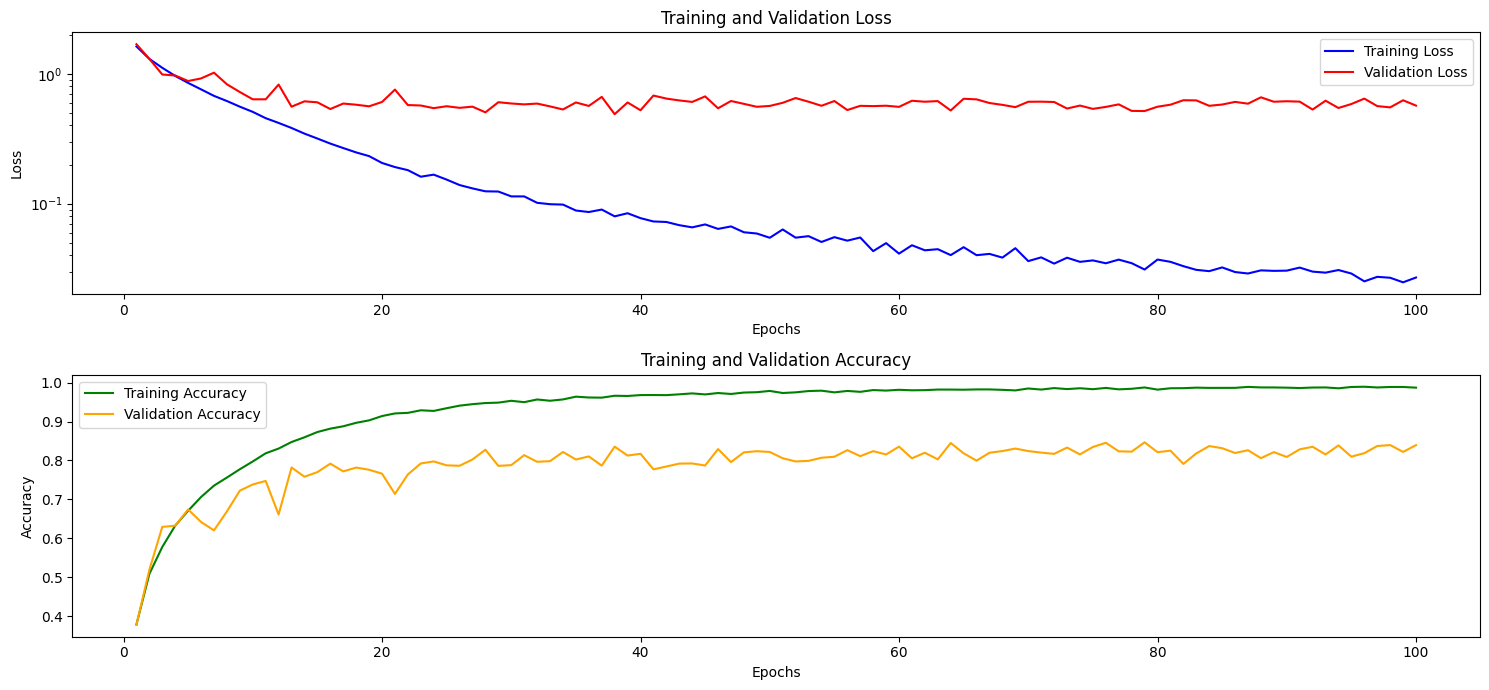

In [2]:
"""
Thanh Le  16 April 2024
How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
"""
import torch
from torch import nn, save, load
from tqdm import tqdm
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchmetrics.functional import accuracy
from torchvision.transforms import ToTensor, Resize
import numpy as np
import os
import matplotlib.pyplot as plt

# Setup CUDA
def setup_cuda():
    # Setting seeds for reproducibility
    seed = 50
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

    return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def train_model():
    """
    Train the model over a single epoch
    :return: training loss and training accuracy
    """
    train_loss = 0.0
    train_acc = 0.0
    model.train()

    for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
        # Get a batch
        img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

        # Set the gradients to zero before starting backpropagation
        optimizer.zero_grad()

        # Perform a feed-forward pass
        logits = model(img)

        # Compute the batch loss
        loss = loss_fn(logits, label)

        # Compute gradient of the loss fn w.r.t the trainable weights
        loss.backward()

        # Update the trainable weights
        optimizer.step()

        # Accumulate the batch loss
        train_loss += loss.item()

        # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
        prediction = logits.argmax(axis=1)
        train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return train_loss / len(train_loader), train_acc / len(train_loader)


def validate_model():
    """
    Validate the model over a single epoch
    :return: validation loss and validation accuracy
    """
    model.eval()
    valid_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
            # Get a batch
            img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

            # Perform a feed-forward pass
            logits = model(img)

            # Compute the batch loss
            loss = loss_fn(logits, label)

            # Accumulate the batch loss
            valid_loss += loss.item()

            # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
            prediction = logits.argmax(axis=1)
            val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

    return valid_loss / len(val_loader), val_acc / len(val_loader)


# Example plotting function

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    # Losses
    plt.figure(figsize=(15, 7))
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.yscale('log')  # Log scale can help for loss curves with large values

    # Accuracies
    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    # Save the figure to a file
    plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

    plt.show()


if __name__ == "__main__":
    device = setup_cuda()

    # 1. Load the dataset
    transform = transforms.Compose([Resize((224, 224)), ToTensor()])
    train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
    val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
    # Get class names
    class_names = train_dataset.classes

    # 2. Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

    # 3. Create a new deep model without pre-trained weights
    # from utils.seresnet18 import ResNet18
    model = ResNet18(
        num_classes=len(class_names),
    ).to(device)

    # 4. Specify loss function and optimizer
    optimizer = Adam(model.parameters(), lr=1e-4)
    loss_fn = torch.nn.CrossEntropyLoss()

    # 5. Train the model with 100 epochs
    # store the metrics for plotting
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    max_acc = 0
    for epoch in range(100):

        # 5.1. Train the model over a single epoch
        train_loss, train_acc = train_model()
        train_losses.append(train_loss)     # save train loss values
        train_accuracies.append(train_acc)  # save train acc values

        # 5.2. Validate the model after training
        val_loss, val_acc = validate_model()
        val_losses.append(val_loss)         # save val loss values
        val_accuracies.append(val_acc)      # save val acc values

        print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
        print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

        # 4.3. Save the model if the validation accuracy is increasing
        if val_acc > max_acc:
            print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
            folder_path = 'checkpoints_resnet18'  # Define the folder name
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)  # Create the folder if it does not exist
            file_path = os.path.join(folder_path,
                                     'resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
            with open(file_path, 'wb') as f:
                save(model.state_dict(), f)
            max_acc = val_acc

# After training is complete, plot the metrics
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing for Resnet18

In [3]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/dataset-split/dataset_split/train'
# test_dir = '/kaggle/input/dataset-split/dataset_split/test'
# valid_dir = '/kaggle/input/dataset-split/dataset_split/val'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     print(f"Tổng số ảnh trong tập test: {len(test_dataset.imgs)}")
    
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     # from utils.resnet18 import ResNet18

#     model = ResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_resnet18'  # Define the folder name
#     file_name = '/kaggle/input/resnet-train-acc/ResNet_train_acc/resnet18_epoch_10_acc_0.7310.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()


In [4]:
# import shutil

# # Nén thư mục output_resnet18 thành file output_images.zip
# shutil.make_archive("/kaggle/working/output_images", 'zip', "/kaggle/working/output_resnet18")

# # Sau đó hiển thị link tải
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/output_images.zip')


In [5]:
# import cv2
# import os
# from glob import glob

# def create_video_from_images(image_folder, output_video_path, fps=10):
#     # Lấy danh sách ảnh trong thư mục (sắp xếp theo tên)
#     image_paths = sorted(glob(os.path.join(image_folder, "*.png")))

#     if not image_paths:
#         print("Không tìm thấy ảnh để tạo video.")
#         return

#     # Đọc ảnh đầu tiên để lấy kích thước
#     frame = cv2.imread(image_paths[0])
#     height, width, _ = frame.shape

#     # Khởi tạo VideoWriter
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec video
#     out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

#     # Ghi từng ảnh vào video
#     for img_path in image_paths:
#         img = cv2.imread(img_path)
#         out.write(img)

#     out.release()
#     print(f" Video đã được lưu tại: {output_video_path}")

# # Chạy hàm để tạo video
# output_video_path = "/kaggle/working/output_video.mp4"
# create_video_from_images("output_resnet18", output_video_path)


In [6]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/output_video.mp4')


# SEBLOCK

In [7]:
# import torch.nn as nn

# class SE_Block(nn.Module):
#     def __init__(self, c, r=16):
#         super(SE_Block, self).__init__()
#         self.squeeze = nn.AdaptiveAvgPool2d(1)
#         self.excitation = nn.Sequential(
#             nn.Linear(c, c // r, bias=False),
#             nn.ReLU(inplace=True),
#             nn.Linear(c // r, c, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         bs, c, _, _ = x.size()
#         y = self.squeeze(x).view(bs, c)
#         y = self.excitation(y).view(bs, c, 1, 1)
#         return x * y.expand_as(x)

# SEBLOCK + Resnet18

In [8]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# class SEBlock(nn.Module):
#     def __init__(self, input_channels, reduction_ratio=16):
#         super(SEBlock, self).__init__()
#         self.avg_pool = nn.AdaptiveAvgPool2d(1)
#         self.fc1 = nn.Linear(input_channels, input_channels // reduction_ratio, bias=False)
#         self.relu = nn.ReLU(inplace=True)
#         self.fc2 = nn.Linear(input_channels // reduction_ratio, input_channels, bias=False)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         batch_size, channels, _, _ = x.size()
#         y = self.avg_pool(x).view(batch_size, channels)
#         y = self.fc1(y)
#         y = self.relu(y)
#         y = self.fc2(y)
#         y = self.sigmoid(y).view(batch_size, channels, 1, 1)
#         return x * y.expand_as(x)


# class SEResNet18(nn.Module):
#     def __init__(self, num_classes):
#         super(SEResNet18, self).__init__()

#         self.dropout_percentage = 0.5
#         self.relu = nn.ReLU()

#         # BLOCK-1 (starting block) input=(224x224) output=(56x56)
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
#         self.batchnorm1 = nn.BatchNorm2d(64)
#         self.maxpool1 = nn.MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

#         # BLOCK-2 (1) input=(56x56) output = (56x56)
#         self.conv2_1_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_1_1 = nn.BatchNorm2d(64)
#         self.conv2_1_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_1_2 = nn.BatchNorm2d(64)
#         self.dropout2_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se2_1 = SEBlock(64)

#         # BLOCK-2 (2)
#         self.conv2_2_1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_2_1 = nn.BatchNorm2d(64)
#         self.conv2_2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm2_2_2 = nn.BatchNorm2d(64)
#         self.dropout2_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se2_2 = SEBlock(64)

#         # BLOCK-3 (1) input=(56x56) output = (28x28)
#         self.conv3_1_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm3_1_1 = nn.BatchNorm2d(128)
#         self.conv3_1_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_1_2 = nn.BatchNorm2d(128)
#         self.concat_adjust_3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout3_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se3_1 = SEBlock(128)

#         # BLOCK-3 (2)
#         self.conv3_2_1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_2_1 = nn.BatchNorm2d(128)
#         self.conv3_2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm3_2_2 = nn.BatchNorm2d(128)
#         self.dropout3_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se3_2 = SEBlock(128)

#         # BLOCK-4 (1) input=(28x28) output = (14x14)
#         self.conv4_1_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm4_1_1 = nn.BatchNorm2d(256)
#         self.conv4_1_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_1_2 = nn.BatchNorm2d(256)
#         self.concat_adjust_4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout4_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se4_1 = SEBlock(256)

#         # BLOCK-4 (2)
#         self.conv4_2_1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_2_1 = nn.BatchNorm2d(256)
#         self.conv4_2_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm4_2_2 = nn.BatchNorm2d(256)
#         self.dropout4_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se4_2 = SEBlock(256)

#         # BLOCK-5 (1) input=(14x14) output = (7x7)
#         self.conv5_1_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
#         self.batchnorm5_1_1 = nn.BatchNorm2d(512)
#         self.conv5_1_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_1_2 = nn.BatchNorm2d(512)
#         self.concat_adjust_5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), stride=(2, 2),
#                                          padding=(0, 0))
#         self.dropout5_1 = nn.Dropout(p=self.dropout_percentage)
#         self.se5_1 = SEBlock(512)

#         # BLOCK-5 (2)
#         self.conv5_2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_2_1 = nn.BatchNorm2d(512)
#         self.conv5_2_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#         self.batchnorm5_2_2 = nn.BatchNorm2d(512)
#         self.dropout5_2 = nn.Dropout(p=self.dropout_percentage)
#         self.se5_2 = SEBlock(512)

#         # Final Block input=(7x7)
#         self.avgpool = nn.AvgPool2d(kernel_size=(7, 7), stride=(1, 1))
#         self.fc = nn.Linear(in_features=1 * 1 * 512, out_features=1000)
#         self.out = nn.Linear(in_features=1000, out_features=num_classes)
#         # END

#     def forward(self, x):
#         # block 1 --> Starting block
#         x = self.relu(self.batchnorm1(self.conv1(x)))
#         op1 = self.maxpool1(x)

#         # block2 - 1
#         x = self.relu(self.batchnorm2_1_1(self.conv2_1_1(op1)))  # conv2_1
#         x = self.batchnorm2_1_2(self.conv2_1_2(x))  # conv2_1
#         x = self.dropout2_1(x)
#         x = self.se2_1(x)
#         # block2 - Adjust - No adjust in this layer as dimensions are already same
#         # block2 - Concatenate 1
#         op2_1 = self.relu(x + op1)
#         # block2 - 2
#         x = self.relu(self.batchnorm2_2_1(self.conv2_2_1(op2_1)))  # conv2_2
#         x = self.batchnorm2_2_2(self.conv2_2_2(x))  # conv2_2
#         x = self.dropout2_2(x)
#         x = self.se2_2(x)
#         # op - block2
#         op2 = self.relu(x + op2_1)

#         # block3 - 1[Convolution block]
#         x = self.relu(self.batchnorm3_1_1(self.conv3_1_1(op2)))  # conv3_1
#         x = self.batchnorm3_1_2(self.conv3_1_2(x))  # conv3_1
#         x = self.dropout3_1(x)
#         x = self.se3_1(x)
#         # block3 - Adjust
#         op2 = self.concat_adjust_3(op2)  # SKIP CONNECTION
#         # block3 - Concatenate 1
#         op3_1 = self.relu(x + op2)
#         # block3 - 2[Identity Block]
#         x = self.relu(self.batchnorm3_2_1(self.conv3_2_1(op3_1)))  # conv3_2
#         x = self.batchnorm3_2_2(self.conv3_2_2(x))  # conv3_2
#         x = self.dropout3_2(x)
#         x = self.se3_2(x)
#         # op - block3
#         op3 = self.relu(x + op3_1)

#         # block4 - 1[Convolition block]
#         x = self.relu(self.batchnorm4_1_1(self.conv4_1_1(op3)))  # conv4_1
#         x = self.batchnorm4_1_2(self.conv4_1_2(x))  # conv4_1
#         x = self.dropout4_1(x)
#         x = self.se4_1(x)
#         # block4 - Adjust
#         op3 = self.concat_adjust_4(op3)  # SKIP CONNECTION
#         # block4 - Concatenate 1
#         op4_1 = self.relu(x + op3)
#         # block4 - 2[Identity Block]
#         x = self.relu(self.batchnorm4_2_1(self.conv4_2_1(op4_1)))  # conv4_2
#         x = self.batchnorm4_2_2(self.conv4_2_2(x))  # conv4_2
#         x = self.dropout4_2(x)
#         x = self.se4_2(x)
#         # op - block4
#         op4 = self.relu(x + op4_1)

#         # block5 - 1[Convolution Block]
#         x = self.relu(self.batchnorm5_1_1(self.conv5_1_1(op4)))  # conv5_1
#         x = self.batchnorm5_1_2(self.conv5_1_2(x))  # conv5_1
#         x = self.dropout5_1(x)
#         x = self.se5_1(x)
#         # block5 - Adjust
#         op4 = self.concat_adjust_5(op4)  # SKIP CONNECTION
#         # block5 - Concatenate 1
#         op5_1 = self.relu(x + op4)
#         # block5 - 2[Identity Block]
#         x = self.relu(self.batchnorm5_2_1(self.conv5_2_1(op5_1)))  # conv5_2
#         x = self.batchnorm5_2_2(self.conv5_2_2(x))  # conv5_2
#         x = self.dropout5_2(x)
#         x = self.se5_2(x)
#         # op - block5
#         op5 = self.relu(x + op5_1)

#         # FINAL BLOCK - classifier
#         x = self.avgpool(op5)
#         x = x.reshape(x.shape[0], -1)
#         x = self.relu(self.fc(x))
#         x = self.out(x)

#         return x


# Train SEBLock

In [9]:
# """
# Thanh Le  16 April 2024
# How to train/fine-tune a pre-trained model on a custom dataset (i.e., transfer learning)
# """
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Setup CUDA
# def setup_cuda():
#     # Setting seeds for reproducibility
#     seed = 50
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)

#     return torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


# def train_model():
#     """
#     Train the model over a single epoch
#     :return: training loss and training accuracy
#     """
#     train_loss = 0.0
#     train_acc = 0.0
#     model.train()

#     for (img, label) in tqdm(train_loader, ncols=80, desc='Training'):
#         # Get a batch
#         img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#         # Set the gradients to zero before starting backpropagation
#         optimizer.zero_grad()

#         # Perform a feed-forward pass
#         logits = model(img)

#         # Compute the batch loss
#         loss = loss_fn(logits, label)

#         # Compute gradient of the loss fn w.r.t the trainable weights
#         loss.backward()

#         # Update the trainable weights
#         optimizer.step()

#         # Accumulate the batch loss
#         train_loss += loss.item()

#         # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#         prediction = logits.argmax(axis=1)
#         train_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return train_loss / len(train_loader), train_acc / len(train_loader)


# def validate_model():
#     """
#     Validate the model over a single epoch
#     :return: validation loss and validation accuracy
#     """
#     model.eval()
#     valid_loss = 0.0
#     val_acc = 0.0

#     with torch.no_grad():
#         for (img, label) in tqdm(val_loader, ncols=80, desc='Valid'):
#             # Get a batch
#             img, label = img.to(device, dtype=torch.float), label.to(device, dtype=torch.long)

#             # Perform a feed-forward pass
#             logits = model(img)

#             # Compute the batch loss
#             loss = loss_fn(logits, label)

#             # Accumulate the batch loss
#             valid_loss += loss.item()

#             # Get the predictions to calculate the accuracy for every iteration. Remember to accumulate the accuracy
#             prediction = logits.argmax(axis=1)
#             val_acc += accuracy(prediction, label, task='multiclass', average='macro', num_classes=len(class_names)).item()

#     return valid_loss / len(val_loader), val_acc / len(val_loader)

# # Example plotting function

# def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
#     epochs = range(1, len(train_losses) + 1)
#     # Losses
#     plt.figure(figsize=(15, 7))
#     plt.subplot(2, 1, 1)
#     plt.plot(epochs, train_losses, label='Training Loss', color='blue')
#     plt.plot(epochs, val_losses, label='Validation Loss', color='red')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Training and Validation Loss')
#     plt.legend()
#     plt.yscale('log')  # Log scale can help for loss curves with large values

#     # Accuracies
#     plt.subplot(2, 1, 2)
#     plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green')
#     plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     # Save the figure to a file
#     plt.savefig("trainplot.png")  # You can change the file name and format (e.g., .png, .jpg, .pdf)

#     plt.show()

# if __name__ == "__main__":
#     device = setup_cuda()

#     # 1. Load the dataset
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     val_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/val', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Create data loaders
#     train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

#     # 3. Create a new deep model without pre-trained weights
#     # from utils.seresnet18 import SEResNet18

#     model = SEResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     # 4. Specify loss function and optimizer
#     optimizer = Adam(model.parameters(), lr=1e-4)
#     loss_fn = torch.nn.CrossEntropyLoss()

#     # 5. Train the model with 100 epochs
#     # store the metrics for plotting
#     train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

#     max_acc = 0
#     for epoch in range(100):

#         # 5.1. Train the model over a single epoch
#         train_loss, train_acc = train_model()
#         train_losses.append(train_loss)  # save train loss values
#         train_accuracies.append(train_acc)  # save train acc values

#         # 5.2. Validate the model after training
#         val_loss, val_acc = validate_model()
#         val_losses.append(val_loss)  # save val loss values
#         val_accuracies.append(val_acc)  # save val acc values

#         print(f'Epoch {epoch}: Train loss = {train_loss}, Train accuracy: {train_acc}')
#         print(f'Epoch {epoch}: Validation loss = {val_loss}, Validation accuracy: {val_acc}')

#         # 4.3. Save the model if the validation accuracy is increasing
#         if val_acc > max_acc:
#             print(f'Validation accuracy increased ({max_acc} --> {val_acc}). Model saved')
#             folder_path = 'checkpoints_se_resnet18'  # Define the folder name
#             if not os.path.exists(folder_path):
#                 os.makedirs(folder_path)  # Create the folder if it does not exist
#             file_path = os.path.join(folder_path,
#                                      'se_resnet18_epoch_' + str(epoch) + '_acc_{0:.4f}'.format(val_acc) + '.pt')
#             with open(file_path, 'wb') as f:
#                 save(model.state_dict(), f)
#             max_acc = val_acc
# # After training is complete, plot the metrics
# plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

# Testing SEResnet18

In [10]:
# import torch
# from torch import nn, save, load
# from tqdm import tqdm
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision.datasets import ImageFolder
# import torchvision.transforms as transforms
# from torchmetrics.functional import accuracy
# from torchvision.transforms import ToTensor, Resize
# import numpy as np
# import os
# from PIL import Image
# import matplotlib.pyplot as plt

# # Thiết lập biến cần thiết
# train_dir = '/kaggle/input/dataset-split/dataset_split/train'
# test_dir = '/kaggle/input/dataset-split/dataset_split/test'
# valid_dir = '/kaggle/input/dataset-split/dataset_split/val'
# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32
# IMG_SIZE = 224
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])
# patch_size = 16
# CLASS = {} # KHONG CAN DIEN CHI TIET


# # Thiết lập thiết bị (GPU hoặc CPU)
# def setup_cuda():
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#     return device


# device = setup_cuda()

# # Thiết lập các transform để xử lý ảnh
# manual_transforms = transforms.Compose([
#     transforms.Resize((IMG_SIZE, IMG_SIZE)),
#     transforms.ToTensor(),
# ])


# # Hàm dự đoán kết quả cho một hình ảnh
# def predict_image(image_path, model, transform, class_names, device):
#     model.eval()
#     img = Image.open(image_path).convert('RGB')
#     img_tensor = transform(img).unsqueeze(0).to(device)
#     with torch.no_grad():
#         output = model(img_tensor)
#         _, predicted_class = torch.max(output, 1)
#     predicted_label = class_names[predicted_class.item()]
#     return img, predicted_label


# # Hàm chính để dự đoán các hình ảnh trong tập test
# def test_model():
#     # 1. Tải dữ liệu và lớp từ tập train
#     transform = transforms.Compose([Resize((224, 224)), ToTensor()])
#     train_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/train', transform=transform)
#     test_dataset = ImageFolder(root='/kaggle/input/dataset-split/dataset_split/test', transform=transform)
#     # Get class names
#     class_names = train_dataset.classes

#     # 2. Tạo mô hình ViT và tải trạng thái từ checkpoint
#     # from utils.resnet18 import ResNet18

#     model = SEResNet18(
#         num_classes=len(class_names),
#     ).to(device)

#     folder_checkpoint = 'checkpoints_se_resnet18'  # Define the folder name
#     file_name = '/kaggle/input/resnet-train-acc/ResNet_train_acc/se_resnet18_epoch_94_acc_0.8560.pt' #best weight
#     file_checkpoint = os.path.join(folder_checkpoint, file_name)  # lay best weight
#     model.load_state_dict(torch.load(file_checkpoint, device))
#     print('Model loaded from checkpoint.')
#     # Ensure the output directory exists
#     output_dir = "output_resnet18"
#     os.makedirs(output_dir, exist_ok=True)

#     # 3. Dự đoán kết quả cho mỗi hình ảnh trong tập test
#     for image_path in tqdm(test_dataset.imgs, desc='Testing'):
#         img, predicted_label = predict_image(image_path[0], model, manual_transforms, class_names, device)
#         # plt.imshow(img)
#         # plt.title(f'Predicted: {predicted_label}')
#         # plt.show()

#         # Convert the tensor image back to a PIL image if necessary
#         if isinstance(img, torch.Tensor):
#             img = transforms.ToPILImage()(img)

#         # Create a plot
#         fig, ax = plt.subplots()

#         # Set white background
#         fig.patch.set_facecolor('white')
#         ax.set_facecolor('white')

#         # Remove axis
#         ax.axis('off')

#         # Display the image
#         ax.imshow(img)

#         # Add the predicted label as the title
#         ax.set_title(f'Predicted: {predicted_label}', fontsize=12, pad=10)

#         # Save the figure
#         image_basename = os.path.basename(image_path[0])
#         image_name, image_ext = os.path.splitext(image_basename)
#         output_image_path = os.path.join(output_dir, f"{image_name}_pred_{predicted_label}.png")

#         plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
#         plt.close(fig)


# if __name__ == '__main__':
#     test_model()
